In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000

In [3]:
ip = np.random.rand(N) > 0.5
ip = ip.astype(int)

In [4]:
Es = 1

In [5]:
eb_no_db = np.arange(0,25)


In [6]:
capacity_rate = np.zeros(len(eb_no_db))

capacity_rate_reduced = np.zeros(len(eb_no_db))
capacity_Rs_CSIT = np.zeros(len(eb_no_db))
capacity_rate_CSIT_reduced = np.zeros(len(eb_no_db))

In [7]:
# snr = 10**eb_no_db/10

In [8]:
def Capacity_Rs():
    
    
    
    for jj in range(len(eb_no_db)):
        
        nTx = 4
        
        nRx = 4
        
        snr = 10**(eb_no_db[jj] / 10)
        
        Rz = 10**(-eb_no_db[jj] / 10) * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz)
        
        Rs = np.divide(Es, nTx) * np.eye(nTx)
        
        capacity = 0
        
        for ii in range(N):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h12 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h13 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h14 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h22 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h23 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h24 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h31 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h32 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h33 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h34 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h41 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h42 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h43 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h44 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            H = np.array([[h11, h12, h13, h14],
                          [h21, h22, h23, h24],
                          [h31, h32, h33, h34],
                          [h41, h42, h43, h44]])
    
            H_hermitian = np.conjugate(H)
        
            H_hermitian = np.transpose(H_hermitian)
            
            X = np.dot(np.dot(np.dot(Rz_inverse, H), Rs), H_hermitian)
            
            Y = np.eye(4)
            
            Z = X + Y
            
            c = np.log2(np.abs(np.linalg.det(Z)))
            
            capacity += c

        capacity =capacity / N
        
        capacity_rate[jj] = capacity
        
        

    return capacity_rate


In [9]:
def capacity_each_channel(Es,nTx,noise_variance,S):
    
    Es = Es
    
    nTx = nTx
    
    noise_variance = noise_variance
    
    S = S
    
    capacity_each_channel = 0
    
    for kk in range(len(S)):
        
        
        c = np.log2(1 + np.divide(Es,np.multiply(nTx,noise_variance)) * (np.square(S[kk]) ))
        

        capacity_each_channel = capacity_each_channel + c
        
    return capacity_each_channel
    
  
    
    
    
    

In [10]:
def capacity_reduced_form():
    
    for jj in range(len(eb_no_db)):
        
        nTx = 4
        
        nRx = 4
        
        Es = 1
        
        Rz = 10**(-eb_no_db[jj] / 10) * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz)
        
        capacity = 0
        
        for ii in range(N):
            
            H = (1/np.sqrt(2)) * (np.random.randn(nTx,nRx) + 1j * np.random.randn(nTx,nRx))
            
            U, S, Vh = np.linalg.svd(H)
    
            noise_variance = 10**(-eb_no_db[jj] / 10)
        
            c = capacity_each_channel(Es,nTx,noise_variance,S)
            
            capacity = capacity + c    
        
        capacity = capacity / N
        
        capacity_rate_reduced[jj] = capacity
        
    return capacity_rate_reduced
            
            

In [11]:
def draw_Q_matrix(S,noise_variance,Es):
    
    S = S
    
    noise_variance = noise_variance
    
    Es = Es
    
    total = 0
    
    q_matrix = []
    
    for kk in range(len(S)):
        
        summation_ratio = np.divide(noise_variance,np.square(S[kk]))
        
        total = total + summation_ratio
        
    for nn in range(len(S)):
        
        q = (1/len(s)) * (Es +total) - (noise_variance/np.square(S[nn]))
        
        q_matrix.append(q)
        
    return q_matrix
    

In [12]:
def calculate_capacity_each_channel(nTx,nRx,Rz_inverse,noise_variance, Es):
    
    nTx = nTx
    
    nRx = nRx
    
    Rz_inverse = Rz_inverse
    
    noise_variance = noise_variance
    
    Es = Es
    
    for ii in range(N):
        
        H =(1/np.sqrt(2)) * (np.random.randn(nTx,nRx) + 1j * np.random.randn(nTx,nRx))
        
        H_hermitian = np.conjugate(H)
        
        H_hermitian = np.transpose(H_hermitian)
        
        U, S, Vh = np.linalg.svd(H, full_matrices=True)
        
        V = np.conjugate(Vh)
        
        V = np.transpose(V)
        
        Q_matrix = draw_Q_matrix(S,noise_variance,Es)
        
        Q_diagonal = np.diag(Q_matrix)
        
        Rs = V @ Q_diagonal @ Vh
        
        inner_part_det = Rz_inverse @ H @ Rs @ H_hermitian
        
        identity = np.eye(nRx)
        
        determinant = identity + inner_part_det
        
        c = np.log2(np.linalg.det(determinant))
        
    return c
        
        
        
    

In [13]:
def capacity_Rs():
    
    for jj in range(len(eb_no_db)):
        
        nTx = 4
        
        nRx = 4
        
        Es = 1
        
        snr = 10**(eb_no_db[jj] / 10)
        
        noise_variance = 10**(-eb_no_db[jj] / 10)
        
        Rz = 10**(-eb_no_db[jj] / 10) * np.eye(nRx)
        
        
        Rz_inverse = np.linalg.inv(Rz)
        
        c = calculate_capacity_each_channel(nTx,nRx,Rz_inverse,noise_variance, Es)
        
        c = c / N
        
        capacity_Rs_CSIT[jj] = c
        
    return capacity_Rs_CSIT
        
        

In [14]:
def q_optimal(S,S_KK,noise_variance):
    
    S = S
    
    S_KK = S_KK
    
    noise_variance = noise_variance
    
    total = 0
    
    for nn in range(len(S)):
        
        summation_ratio = np.divide(noise_variance,np.square(S[nn]))
        
        total = total + summation_ratio
    
    qi_opt = np.multiply(np.divide(1,len(S)),(Es + total))-np.divide(noise_variance,np.square(S_KK))
    
    return qi_opt

In [15]:
def capacity_each_channel_CSIT(noise_variance,S):
    
    noise_variance = noise_variance
    
    S = S
    
    capacity_each_channel = 0
    
    for kk in range(len(S)):
        
        S_KK = S[kk]
        
        qi_opt = q_optimal(S,S_KK,noise_variance)
        
        c = np.log2(1 + np.multiply(np.divide(1,noise_variance),np.square(S[kk])) * qi_opt)
        
#         c = np.log2(1 + 1/noise_variance * np.square(S[kk]) * qi_opt)
        
        capacity_each_channel = capacity_each_channel + c
    
    return capacity_each_channel
    
    

In [16]:
def capacity_for_CSIT(nTx,nRx,Es,noise_variance):
    
    nTx = nTx
    
    nRx = nRx
    
    Es = Es
    
    noise_variance = noise_variance
    
    capacity = 0
    
    for ii in range(N):
        
        H = (1/np.sqrt(2)) * (np.random.randn(nTx,nRx) + 1j * np.random.randn(nTx,nRx))
        
        U, S, Vh = np.linalg.svd(H)
        
        
        c= capacity_each_channel_CSIT(noise_variance,S)
        
        capacity = capacity + c
        
    return capacity
        
        
    

In [17]:
def Reduced_CSIT():
    
    for jj in range(len(eb_no_db)):
        
        nTx = 4
        
        nRx = 4
        
        Es = 1
        
        noise_variance = 10**(-eb_no_db[jj] / 10)
        
        capacity = capacity_for_CSIT(nTx,nRx,Es,noise_variance)
        
        capacity = capacity / N
        
        capacity_rate_CSIT_reduced[jj] = capacity
        
    return capacity_rate_CSIT_reduced
        
    

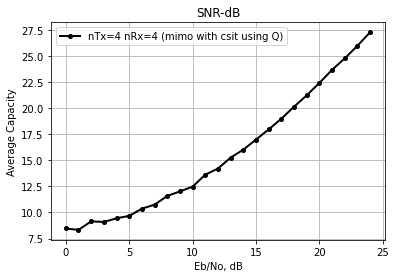

In [18]:
# capacity = Capacity_Rs() 
# capacity_reduced_form = capacity_reduced_form()
reduced_csit = Reduced_CSIT()
plt.figure()

# plt.plot(eb_no_db, capacity, 'r^-', linewidth=2, markersize=4, label='nTx=4 nRx=4 (mimo w/o csit using Rs)')

# plt.plot(eb_no_db, capacity_reduced_form, 'g--', linewidth=2, markersize=4, label='nTx=4 nRx=4 (mimo w/o csit using Q)')
plt.plot(eb_no_db, reduced_csit, 'ko-', linewidth=2, markersize=4, label='nTx=4 nRx=4 (mimo with csit using Q)')
plt.grid(True)

plt.legend()

plt.xlabel('Eb/No, dB')

plt.ylabel('Average Capacity')

plt.title('SNR-dB')

plt.show()

